In [18]:
#1. Data wrangling 
#let's put some zeros and none values to fix next  
import csv
import pandas as pd
import numpy as np


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'
path2='/Users/yaseminyarnell/simplilearn/applied data science/Project/output1.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])



#Assing zeros and None to specific cell
#Assign None to first row of State column
df.loc[0, "State"] = 'None'
df.loc[14, "State"] = 'None'

df.loc[2, "Time"] = 'None'
df.loc[61, "Time"] = 'None'

df.loc[1, "Unit"] = 0
df.loc[61, "Unit"] = 0
df.loc[23, "Sales"] = 0

df.loc[3, "Date"] = ' '
df

#print missing values
missing_values=df.isnull().sum()
print("print missing values",missing_values)


df['Time'] = df['Time'].replace('None',"Morning")

arr = np.array(['WA','SA','NT','VIC','QLD','TAS','NSW'])
for i in range(len(arr)):
  df['State'] = df['State'].replace('None',arr[i])


median_unit = df['Unit'].median()
df['Unit'] = df['Unit'].replace(0,median_unit)
df.replace('',np.nan,regex = True) 





print missing values Time        5
State       5
Group       7
Unit        5
Sales       6
Date     7566
dtype: int64


,Time,State,Group,Unit,Sales,Date
Date,,,,,,
2020-10-01 00:00:00,Morning,WA,Kids,8.0,20000.0,NaN
2020-10-01 00:00:00,Morning,WA,Men,8.0,20000.0,NaN
2020-10-01 00:00:00,Morning,WA,Women,4.0,10000.0,NaN
2020-10-01 00:00:00,Morning,WA,Seniors,15.0,37500.0,NaN
2020-10-01 00:00:00,Afternoon,WA,Kids,3.0,7500.0,NaN
...,...,...,...,...,...,...
2,Morning,NaN,NaN,NaN,NaN,NaN
61,Morning,NaN,NaN,14.0,NaN,NaN
1,NaN,NaN,NaN,14.0,NaN,NaN


In [19]:
import csv
import pandas as pd
import numpy as np


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'

path2='/Users/yaseminyarnell/simplilearn/applied data science/Project/output1.csv'


df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])
df['Time'] = df['Time'].replace('None',"Morning")

arr = np.array(['WA','SA','NT','VIC','QLD','TAS','NSW'])
for i in range(len(arr)):
  df['State'] = df['State'].replace('None',arr[i])


median_unit = df['Unit'].median()
df['Unit'] = df['Unit'].replace(0,median_unit)
df.replace('',np.nan,regex = True) 


value = df.iat[506, 1]  # Row 506, Column 1
print("Single cell by position:",value)
df.to_csv(path2)



Single cell by position:  WA


In [20]:
# 1.C  Data Standardization and Normalization
import numpy as np
import pandas as pd

path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])
if 'Sales' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Sales'] = df['Sales'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:
                  Time State     Group  Unit  Sales  Log_Sales  \
Date                                                             
2020-10-01     Morning    WA      Kids     8  20000   9.903488   
2020-10-01     Morning    WA       Men     8  20000   9.903488   
2020-10-01     Morning    WA     Women     4  10000   9.210340   
2020-10-01     Morning    WA   Seniors    15  37500  10.532096   
2020-10-01   Afternoon    WA      Kids     3   7500   8.922658   
...                ...   ...       ...   ...    ...        ...   
2020-12-30   Afternoon   TAS   Seniors    14  35000  10.463103   
2020-12-30     Evening   TAS      Kids    15  37500  10.532096   
2020-12-30     Evening   TAS       Men    15  37500  10.532096   
2020-12-30     Evening   TAS     Women    11  27500  10.221941   
2020-12-30     Evening   TAS   Seniors    13  32500  10.388995   

            Normalized_Sales  
Date                          
2020-10-01          0.095238  
2020-10-01         

In [21]:
#I have 2 examples for 1-d. Merging by groupby.This is my first solution for 1-d
import numpy as np
import pandas as pd


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'
path2='/Users/yaseminyarnell/simplilearn/applied data science/HousePrices.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])

df2=pd.read_csv(path2)


dfmax = df.groupby('State')['Sales'].max()

df.set_index('State', inplace=True)

df = df.merge(dfmax, how='outer', left_index=True, right_index=True)

df.reset_index(inplace=True)
df



    



,State,Time,Group,Unit,Sales_x,Sales_y
0,NSW,Morning,Kids,39,97500,112500
1,NSW,Morning,Men,17,42500,112500
2,NSW,Morning,Women,34,85000,112500
3,NSW,Morning,Seniors,23,57500,112500
4,NSW,Afternoon,Kids,40,100000,112500
...,...,...,...,...,...,...
7555,WA,Afternoon,Seniors,15,37500,37500
7556,WA,Evening,Kids,6,15000,37500
7557,WA,Evening,Men,6,15000,37500
7558,WA,Evening,Women,14,35000,37500


In [22]:
#I have 2 examples for 1-d. Merging by groupby.This is my second solution for 1-d
import numpy as np
import pandas as pd


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'
path2='/Users/yaseminyarnell/simplilearn/applied data science/HousePrices.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])

df2=pd.read_csv(path2)

sales=df['Sales']

#Add Sales column from df to df2.
#df2["Sales"] = pd.Series([sales])
sales=df['Sales']

#Add Sales column from df to df2.
df2["Sales"] = pd.Series([sales])
print("print new df2 ",df2.columns)
Result = df.join(df2,lsuffix='_left',how="outer",on="Sales")
print(Result.columns)






print new df2  Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Sales'],
      dtype='object')
Index(['Time', 'State', 'Group', 'Unit', 'Sales_left', 'date', 'price',
       'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Sales'],
      dtype='object')


In [23]:

#2.  a,b,c

import numpy as np
import pandas as pd


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'
path2='/Users/yaseminyarnell/simplilearn/applied data science/HousePrices.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])

df2=pd.read_csv(path)

sum=df['Group'].str.contains('Kids').sum()
print("Goup contains number of Kids",sum)

#max value in sales column
print("Max value of Sales column",df['Sales'].max())
print("STD value of Sales column",df['Unit'].std())


total_amount = df['Sales'].value_counts()
print("total amount from sales",total_amount)
#1.d Grouping the data by State
grouped_data = df2.groupby('State')

# Calculating the average sales for each state
average_sales = grouped_data['Sales'].mean()
print("Average sales",average_sales)
#Number 2 the project:
print("Mean of sales:",df2['Sales'].mean(numeric_only=True))
print("Mean of unit:",df2['Unit'].mean(numeric_only=True))
print("Median of sales:",df2['Sales'].median(numeric_only=True))
print("Median of unit:",df2['Unit'].median(numeric_only=True))
print("Mode of sales:",df2['Sales'].mode())
print("Mode of unit:",df2['Unit'].mode())
print("Standard deviation of sales:",df2['Sales'].std(numeric_only=True))
print("Standard deviation of unit:",df2['Unit'].std(numeric_only=True))

df2 = df.groupby('Group')['Sales'].sum()
print("Max", df2.max())
print("Min", df2.min())
print("Print sales",df2 )

Goup contains number of Kids 1890
Max value of Sales column 162500
STD value of Sales column 12.901402777586455
total amount from sales Sales
22500     406
25000     402
15000     370
20000     369
17500     362
         ... 
132500      9
152500      9
135000      9
150000      7
145000      5
Name: count, Length: 64, dtype: int64
Average sales State
NSW    69416.666667
NT     20907.407407
QLD    30942.129630
SA     54497.685185
TAS    21074.074074
VIC    97745.370370
WA     20511.574074
Name: Sales, dtype: float64
Mean of sales: 45013.5582010582
Mean of unit: 18.00542328042328
Median of sales: 35000.0
Median of unit: 14.0
Mode of sales: 0    22500
Name: Sales, dtype: int64
Mode of unit: 0    9
Name: Unit, dtype: int64
Standard deviation of sales: 32253.506943966317
Standard deviation of unit: 12.901402777586455
Max 85750000
Min 84037500
Print sales Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


In [24]:

#2d weekly, monthly, and quarterly sales
import pandas as pd
import numpy as np


path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])

df2 = pd.DataFrame(df)
df2 = df.groupby('Group')['Sales'].sum()

df2['Date'] = pd.to_datetime(df2)

print("print monthly")
df5=df.groupby([pd.Grouper(df2['Date'], freq='m')])['Sales'].sum().reset_index()
print(df5)

print("print weekly")
df6=df.groupby([pd.Grouper(df2['Date'], freq='w')])['Sales'].sum().reset_index()
print(df6)

print("print quarterly")
df7=df.groupby([pd.Grouper(df2['Date'], freq='q')])['Sales'].sum().reset_index()
print("quarterly data",df7)

print monthly
        Date      Sales
0 2020-10-31  114290000
1 2020-11-30   90682500
2 2020-12-31  135330000
print weekly
         Date     Sales
0  2020-10-04  15045000
1  2020-10-11  27002500
2  2020-10-18  26640000
3  2020-10-25  26815000
4  2020-11-01  21807500
5  2020-11-08  20865000
6  2020-11-15  21172500
7  2020-11-22  21112500
8  2020-11-29  21477500
9  2020-12-06  29622500
10 2020-12-13  31525000
11 2020-12-20  31655000
12 2020-12-27  31770000
13 2021-01-03  13792500
print quarterly
quarterly data         Date      Sales
0 2020-12-31  340302500


/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_7205/2580007672.py:20: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_7205/2580007672.py:24: FutureWarning:

'w' is deprecated and will be removed in a future version, please use 'W' instead.

/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_7205/2580007672.py:28: FutureWarning:

'q' is deprecated and will be removed in a future version, please use 'QE' instead.



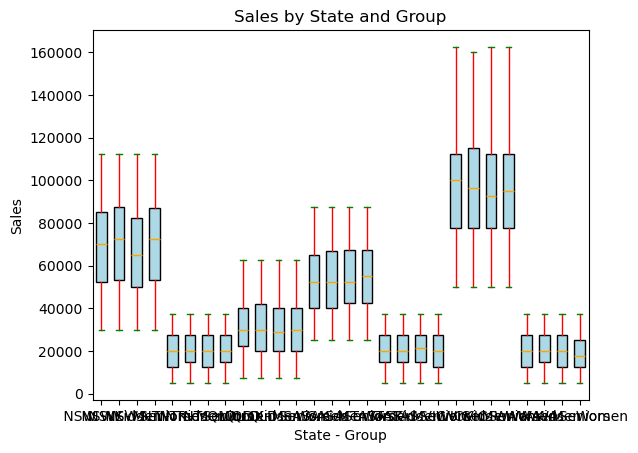

<Figure size 1200x800 with 0 Axes>

In [12]:
# 3-a)State-wise sales analysis. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
df = pd.read_csv('/Users/yaseminyarnell/simplilearn/applied data science/project/output.csv')
#4 Use a box plot to visualize the distribution of SalePrice in each Neighborhood.
#housing_data = pd.read_csv('/Users/yaseminyarnell/simplilearn/applied data science/housing_data.csv')
data = pd.DataFrame(df)

# Calculate median sales
# Calculate median sales by state and category
median_sales = data.groupby(['State', 'Group'])['Sales'].mean().reset_index()

# Create the figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(data.groupby(['State', 'Group'])['Sales'].apply(list).values, 
           positions=[x for x in range(len(median_sales))], 
           widths=0.6, 
           patch_artist=True,boxprops=dict(facecolor='lightblue'),whiskerprops=dict(color='red'),capprops=dict(color='green'), 
            medianprops=dict(color='orange'))

# Add scatter plot for median values
ax.scatter(range(len(median_sales)), median_sales['Sales'], color='red', marker='o')

# Set labels and ticks
ax.set_xticklabels(median_sales['State'] + ' - ' + median_sales['Group'])
ax.set_xlabel('State - Group')
ax.set_ylabel('Sales')
ax.set_title('Sales by State and Group')
plt.figure(figsize=(12, 8))
plt.show()




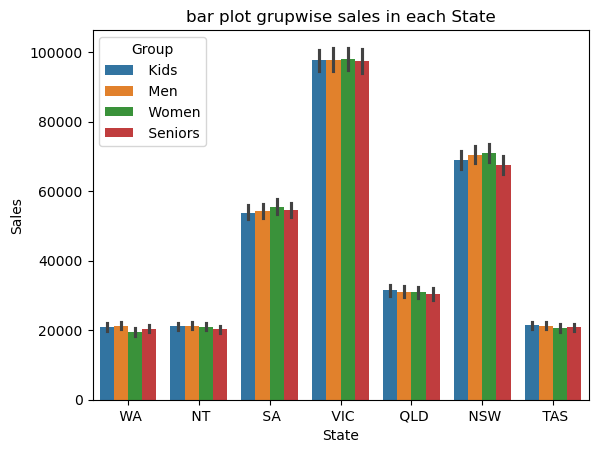

In [13]:
#3 b)Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/yaseminyarnell/simplilearn/applied data science/project/output.csv')

plt.title('bar plot grupwise sales in each State') 
 
# who v/s fare barplot 
sns.barplot(x = 'State',
            y = 'Sales',
            hue = 'Group',
            data = df)
 
# Show the plot
plt.show()




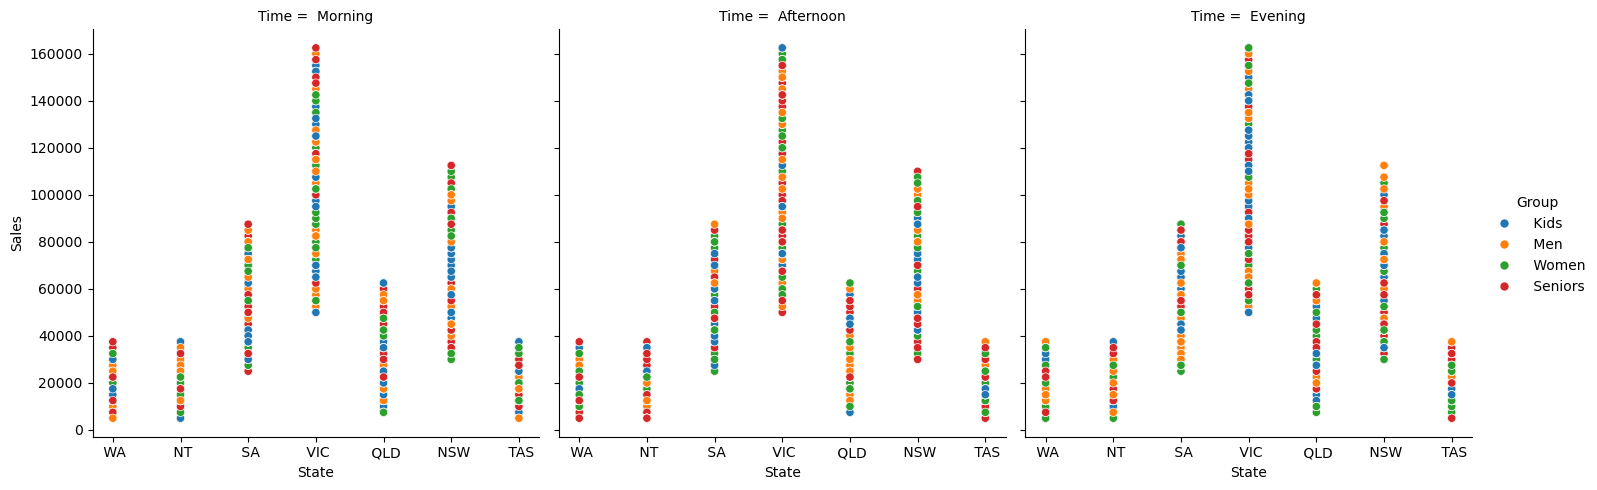

In [14]:
#3-c)
'''c) Time-of-the-day analysis: Identify peak and off-peak sales periods 
to facilitate strategic planning for S&M teams. This information aids 
in designing programs like hyper-personalization and Next Best Offers 
to enhance sales.'''
#i chose relplot because it visualize on 3 columns categorized by Time. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/yaseminyarnell/simplilearn/applied data science/project/output.csv')

#plt.title('bar plot grupwise sales in each State') 
df.head()
 
# Seaborn relplot is a scatter plot
sns.relplot(x = 'State',
            y = 'Sales',
            hue = 'Group',
            col='Time',
            data = df)
 
# Show the plot
plt.show()

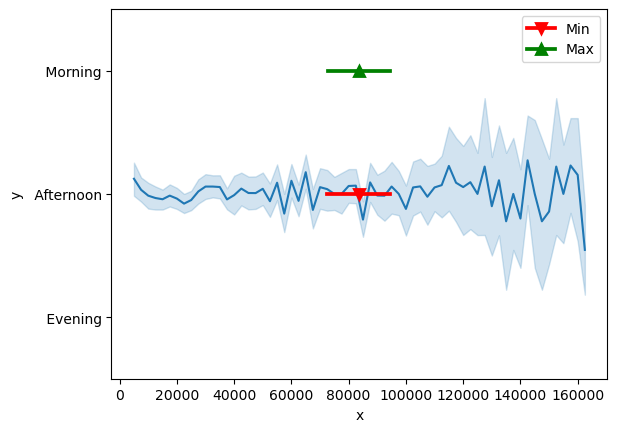

In [15]:
#2nd way of 3C, max and min sales by Time of the day. 
# I chose pointplot because it gives sales by time and including min and max sales indicator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/yaseminyarnell/simplilearn/applied data science/project/output.csv')

# Sample data
data = pd.DataFrame({
    'x': df['Sales'],
    'y': df['Time']
})

# Calculate min and max values
min_values = data.groupby('x')['y'].min().reset_index()
max_values = data.groupby('x')['y'].max().reset_index()

# Create the line plot
sns.lineplot(x='x', y='y', data=data)

# Overlay the min and max points
sns.pointplot(x='x', y='y', data=min_values, color='red', label='Min', markers='v')
sns.pointplot(x='x', y='y', data=max_values, color='green', label='Max', markers='^')

plt.legend()
plt.show()

print monthly
        Date      Sales
0 2020-10-31  114290000
1 2020-11-30   90682500
2 2020-12-31  135330000
print weekly
         Date     Sales
0  2020-10-04  15045000
1  2020-10-11  27002500
2  2020-10-18  26640000
3  2020-10-25  26815000
4  2020-11-01  21807500
5  2020-11-08  20865000
6  2020-11-15  21172500
7  2020-11-22  21112500
8  2020-11-29  21477500
9  2020-12-06  29622500
10 2020-12-13  31525000
11 2020-12-20  31655000
12 2020-12-27  31770000
13 2021-01-03  13792500
print quarterly
quarterly data 0   2020-12-31
Name: Date, dtype: datetime64[ns]


/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_10025/404866569.py:22: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df5=df.groupby([pd.Grouper(df2['Date'], freq='m')])['Sales'].sum().reset_index()
/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_10025/404866569.py:26: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df6=df.groupby([pd.Grouper(df2['Date'], freq='w')])['Sales'].sum().reset_index()
/var/folders/rk/fmc7kvg57cv_cp9f3fgmj7n00000gn/T/ipykernel_10025/404866569.py:30: FutureWarning: 'q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df7=df.groupby([pd.Grouper(df2['Date'], freq='q')])['Sales'].sum().reset_index()


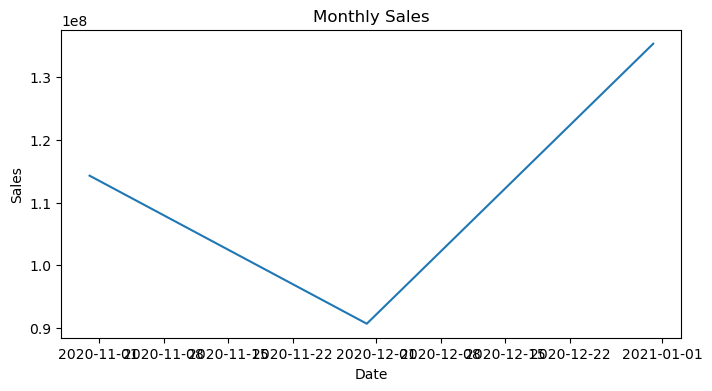

([0], [Text(0, 0, '2020-12-31')])

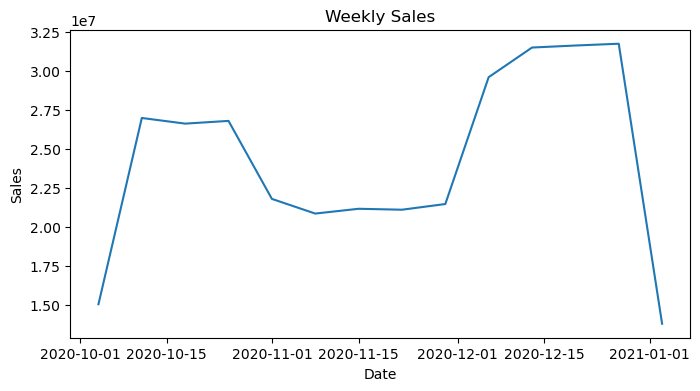

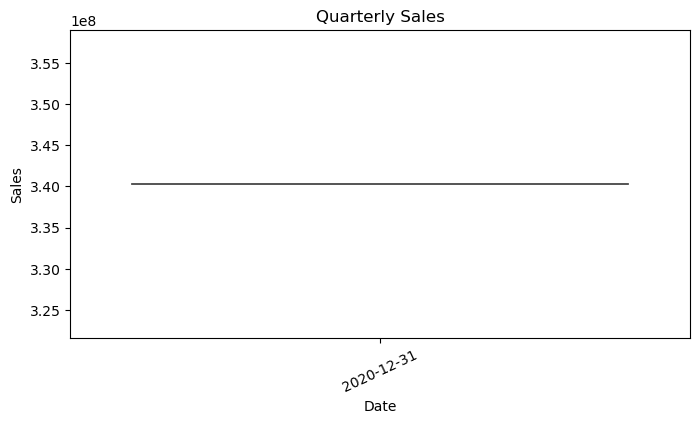

In [16]:
# 3-D i choose to plot each seperately because weekly, monthly and quarterly data they have diffrent length.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



path='/Users/yaseminyarnell/simplilearn/applied data science/Project/output.csv'

df = pd.read_csv(path,
        header=0,
        parse_dates=True, 
        index_col=0,
        usecols=["Date", "Time",'State','Group','Unit','Sales'])

df2 = pd.DataFrame(df)
df2 = df.groupby('Group')['Sales'].sum()

df2['Date'] = pd.to_datetime(df2)

print("print monthly")
df5=df.groupby([pd.Grouper(df2['Date'], freq='m')])['Sales'].sum().reset_index()
print(df5)

print("print weekly")
df6=df.groupby([pd.Grouper(df2['Date'], freq='w')])['Sales'].sum().reset_index()
print(df6)

print("print quarterly")
df7=df.groupby([pd.Grouper(df2['Date'], freq='q')])['Sales'].sum().reset_index()
print("quarterly data",df7.Date) 

  
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df5.Date, y=df5.Sales)
plt.title('Monthly Sales')
plt.show()

# Plot weekly averages
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x=df6.Date, y=df6.Sales)
plt.title('Weekly Sales')
#plt.show()

# Plot weekly averages
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x=df7.Date, y=df7.Sales)
plt.title('Quarterly Sales')
plt.xticks(rotation = 25)



  

